First Part

In [37]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history1 = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 5s 16ms/step - loss: 0.3937 - accuracy: 0.0102 - val_loss: 0.3237 - val_accuracy: 0.0124
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.3129 - accuracy: 0.0150 - val_loss: 0.3093 - val_accuracy: 0.0140
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.3046 - accuracy: 0.0143 - val_loss: 0.3041 - val_accuracy: 0.0129
Epoch 4/5
235/235 [==============================] - 4s 17ms/step - loss: 0.3000 - accuracy: 0.0146 - val_loss: 0.3003 - val_accuracy: 0.0128
Epoch 5/5
235/235 [==============================] - 3s 14ms/step - loss: 0.2969 - accuracy: 0.0145 - val_loss: 0.2978 - val_accuracy: 0.0151


Prediction on the test data & Visualizing the before & after images

313/313 [==============================] - 1s 2ms/step


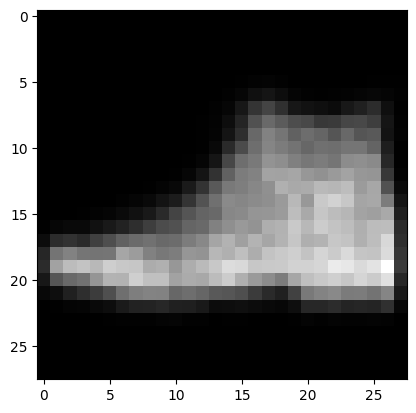

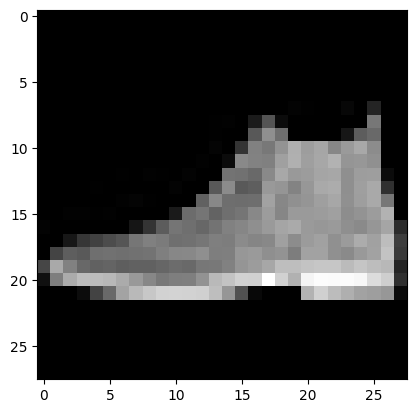

In [38]:
pred_imgs = autoencoder.predict(x_test)

import matplotlib.pyplot as plt
plt.imshow(pred_imgs[0].reshape(28,28))
plt.gray()
plt.show()
plt.imshow(x_test[0].reshape(28,28))
plt.gray()
plt.show()

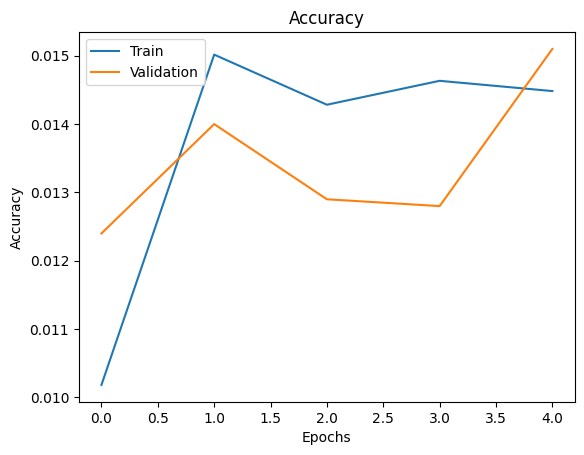

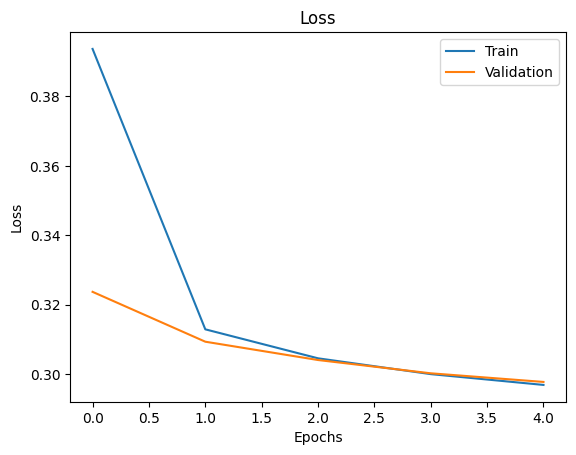

In [39]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Second Part - Denoising Autoencoder

In [44]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation = 'relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder2 = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history2 = autoencoder2.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 [==============================] - 5s 14ms/step - loss: 0.3977 - accuracy: 0.0068 - val_loss: 0.3327 - val_accuracy: 0.0107
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.3227 - accuracy: 0.0115 - val_loss: 0.3206 - val_accuracy: 0.0162
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 0.3148 - accuracy: 0.0119 - val_loss: 0.3150 - val_accuracy: 0.0148
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.3104 - accuracy: 0.0127 - val_loss: 0.3118 - val_accuracy: 0.0125
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3074 - accuracy: 0.0125 - val_loss: 0.3089 - val_accuracy: 0.0139
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.3051 - accuracy: 0.0126 - val_loss: 0.3074 - val_accuracy: 0.0157
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.3035 - accuracy: 0.0132 - val_loss: 0.3058 - val_accuracy: 0.0143

313/313 [==============================] - 1s 3ms/step


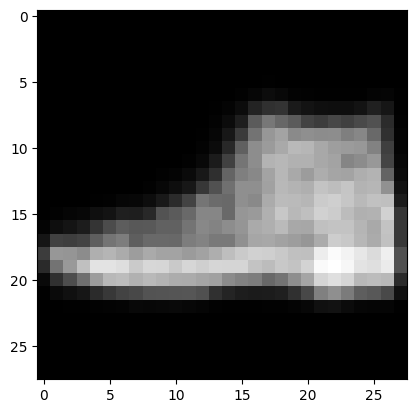

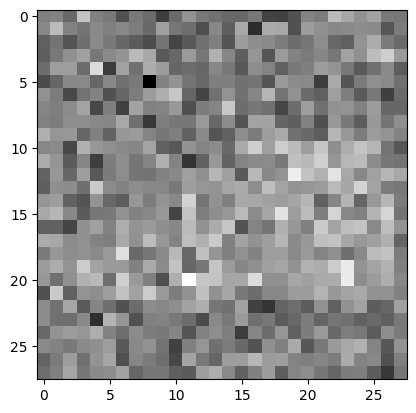

In [49]:
pred_imgs = autoencoder2.predict(x_test_noisy)

import matplotlib.pyplot as plt
plt.imshow(pred_imgs[0].reshape(28,28))
plt.gray()
plt.show()
plt.imshow(x_test_noisy[0].reshape(28,28))
plt.gray()
plt.show()

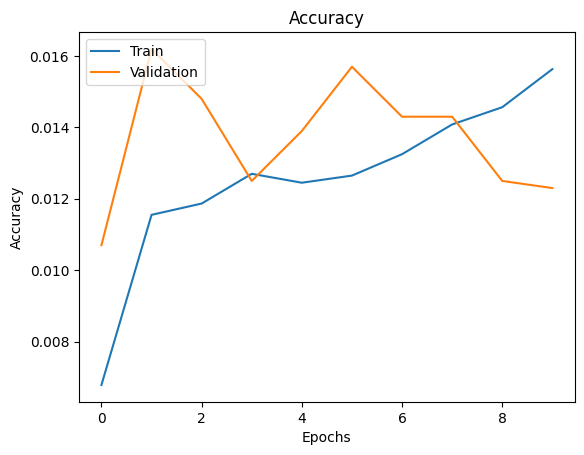

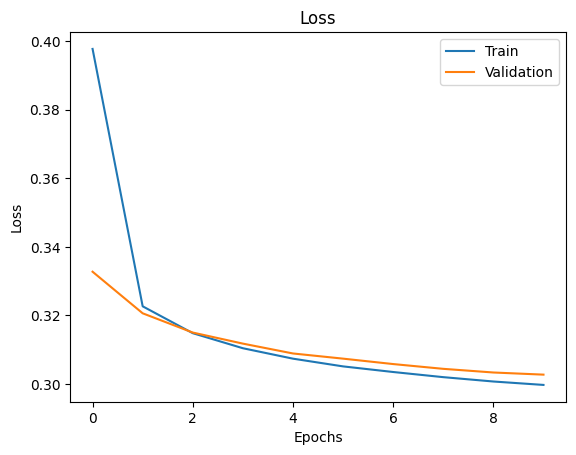

In [46]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()